In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Classified Data',index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

In [10]:
scaled_arr = ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [11]:
scaled_arr

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
X = pd.DataFrame(data=scaled_arr,columns=df.columns[:-1])

In [14]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [15]:
y=df['TARGET CLASS']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 595 to 463
Data columns (total 10 columns):
WTT    700 non-null float64
PTI    700 non-null float64
EQW    700 non-null float64
SBI    700 non-null float64
LQE    700 non-null float64
QWG    700 non-null float64
FDJ    700 non-null float64
PJF    700 non-null float64
HQE    700 non-null float64
NXJ    700 non-null float64
dtypes: float64(10)
memory usage: 60.2 KB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 198 to 351
Data columns (total 10 columns):
WTT    300 non-null float64
PTI    300 non-null float64
EQW    300 non-null float64
SBI    300 non-null float64
LQE    300 non-null float64
QWG    300 non-null float64
FDJ    300 non-null float64
PJF    300 non-null float64
HQE    300 non-null float64
NXJ    300 non-null float64
dtypes: float64(10)
memory usage: 25.8 KB


In [20]:
len(y_train)

700

In [21]:
len(y_test)

300

# K nearest neighbour is done by trial and error

In [22]:
from sklearn.neighbors import KNeighborsClassifier # applied K Nearest Neighbour

In [23]:
model = KNeighborsClassifier(n_neighbors=1) #n_beighbour is K value for the model

In [24]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
ypred = model.predict(X_test)

In [26]:
np.mean(ypred!=y_test) #used numpy mean function to check error rate between ypred and y_test of applied n_neighbour value.
# will give True if ypred and y_test are not equal and create mean of it

0.06666666666666667

In [27]:
np.mean(ypred==y_test)  #used numpy mean function to check accuracy between ypred and y_test of applied n_neighbour value.
# will give True if ypred and y_test are equal and create mean of it

0.9333333333333333

In [28]:
error_rate=[] #looping above step to check the lowest error_rate and output it into list.
for i in range(1,51):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    error_rate.append(np.mean(ypred!=y_test))

In [29]:
error_rate

[0.06666666666666667,
 0.06333333333333334,
 0.07,
 0.07333333333333333,
 0.08333333333333333,
 0.07,
 0.07333333333333333,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333333,
 0.08333333333333333,
 0.07,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.06333333333333334,
 0.06,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

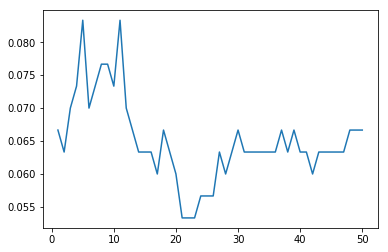

In [30]:
plt.plot(range(1,51),error_rate) # to check all the 50 values using visualization to see the lowest error rate easier way

In [31]:
model = KNeighborsClassifier(n_neighbors=21) 
#taking the best neighbour value found out from above lopping step and creating final model.

In [32]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [33]:
ypred = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(ypred,y_test)

array([[130,   5],
       [ 11, 154]], dtype=int64)